In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
from sklearn import linear_model

In [60]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
input = np.column_stack((X,y))

In [64]:
#input to these fountion contains Data Along with last column as class to which it belongs
def my_LDA(input):
    
    #Extracting Information from the data
    x = input[:,:-1]
    no_of_class = len(np.unique(input[:,input.shape[1]-1]))
    
    #first thing we need to calculate here is mean vector
    mean = []
    #mu1, mu2, mu3.....,muk
    for k in range(0, no_of_class):
        #Calculating mean of all such tuples where class = k, for all the classes
        mu_for_class = np.sum(input[input[:,(input.shape[1]-1)] == k], axis = 0)/len(input[input[:,(input.shape[1]-1)] == k])
        #till here mean column consists of class label as well(as last column)
        #deleting class label and appending it
        mean.append(np.delete(mu_for_class,input.shape[1]-1,0)) 
    print(mean)
    
    #mean of entire subset
    mean_entire = np.sum(x, axis=0)/len(x)
    
    #Calculating S_within in feature space
    # s_for_class = Sum((x-mu1)(x-mu1)T)
    # S_within = summation of all s_for_class
    S_within = np.zeros((x.shape[1],x.shape[1]))
    for k in range(0, no_of_class):
        x_for_class = input[input[:,(input.shape[1]-1)] == k][:,:-1]
        s_for_class = np.zeros((x.shape[1],x.shape[1]))
        for m in range (0,x_for_class.shape[0]):
            x_minus_mean = (x_for_class[m] - mean[k]).reshape(x.shape[1],1)    #this is column matrix
            x_minus_mean_transpose = x_minus_mean.T #this is column matrix
            s_for_class = s_for_class + np.matmul(x_minus_mean,x_minus_mean_transpose) 
        S_within = S_within + s_for_class
    print(S_within)
        
    #Calculating S_between
    S_between = np.zeros((x.shape[1],x.shape[1]))
    for k in range(0, no_of_class):
        mean_diff = (mean[k] - mean_entire).reshape(mean_entire.shape[0],1)
        mean_diff_transpose = mean_diff.T;
        S_between = S_between + np.matmul(mean_diff,mean_diff_transpose)
    print(S_between)
    
    
    #Now lets calculate the optimal W, known as W_star = S_within_inverse*S_between
    W_star = np.matmul(np.linalg.inv(S_within),S_between)
    print(W_star)
    
    #Calculating eigen_values and eigen_vectors
    value,vector = np.linalg.eig(np.array(W_star))
    
    #Sorting eigen_values and eigen_vectors
    index = value.argsort()[::-1]
    eigen_value = value[index]
    prin_component = vector[:,index]

    #We plot take first (k-1) components
    lda_output = np.dot(x,prin_component[:,0:no_of_class-1])
    
    return S_within,S_between, W_star,lda_output

In [65]:
S_within,S_between, W_star, lda_output = my_LDA(input)

[array([ 5.006,  3.418,  1.464,  0.244]), array([ 5.936,  2.77 ,  4.26 ,  1.326]), array([ 6.588,  2.974,  5.552,  2.026])]
[[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]
[[ 1.26424267 -0.39068     3.30329333  1.42726133]
 [-0.39068     0.219552   -1.121104   -0.449848  ]
 [ 3.30329333 -1.121104    8.73287467  3.73816267]
 [ 1.42726133 -0.449848    3.73816267  1.61208267]]
[[-0.06049419  0.02097089 -0.16037413 -0.06849721]
 [-0.1124181   0.04304984 -0.3021683  -0.12765321]
 [ 0.16057915 -0.05730874  0.42737317  0.18196891]
 [ 0.21334399 -0.06826502  0.5598107   0.24106167]]


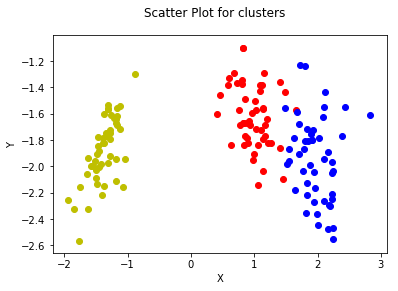

In [67]:
#Now lets plot the new reduced dimension data
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(lda_output[0:50,0],lda_output[0:50,1], c= 'y')
ax.scatter(lda_output[50:100,0],lda_output[50:100,1], c= 'r')
ax.scatter(lda_output[101:150,0],lda_output[101:150,1], c = 'b')